In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, MaxPool2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:

IMAGE_SIZE = [224, 224]

train_path = 'D:/dissertation data/segmented train/'
valid_path = 'D:/dissertation data/segmented test/'


In [4]:


inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [5]:

for layer in inception.layers:
    layer.trainable = False

In [6]:

folders = glob('D:/dissertation data/segmented train/*')

In [7]:

x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=inception.input, outputs=prediction)

In [9]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy',tf.keras.metrics.AUC(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)


In [10]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:

training_set = train_datagen.flow_from_directory('D:/dissertation data/segmented train/',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 54306 images belonging to 38 classes.


In [12]:
test_set = test_datagen.flow_from_directory('D:/dissertation data/segmented test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 11393 images belonging to 38 classes.


In [13]:
training_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [14]:

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\MAHI\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
849/849 [==============================] - 6245s 7s/step - loss: 3.8147 - accuracy: 0.7106 - auc: 0.8996 - precision: 0.7235 - recall: 0.7076 - val_loss: 2.4379 - val_accuracy: 0.8589 - val_auc: 0.9479 - val_precision: 0.8605 - val_recall: 0.8585
Epoch 2/25
849/849 [==============================] - 3255s 4s/step - loss: 1.7157 - accuracy: 0.8699 - auc: 0.9537 - precision: 0.8708 - recall: 0.8694 - val_loss: 1.8313 - val_accuracy: 0.8825 - val_auc: 0.9554 - val_precision: 0.8835 - val_recall: 0.8824
Epoch 3/25
849/849 [==============================] - 3206s 4s/step - loss: 1.5151 - accuracy: 0.8972 - auc: 0.9628 - precision: 0.8976 - recall: 0.8969 - val_loss: 1.1102 - val_accuracy: 0.9248 - val_auc: 0.9720 - val_precision: 0.9251 - val_recall: 0.9248
Epoch 4/25
849/849 [==============================] - 3224s 4s/step - loss: 1.4084 - accuracy: 0.9112 - auc: 0.9662 - precision: 0.9116 - recall: 0.9111 - val_loss: 1.2245 - val_accuracy: 0.9244 - val_auc: 0.9707 - val_precisi

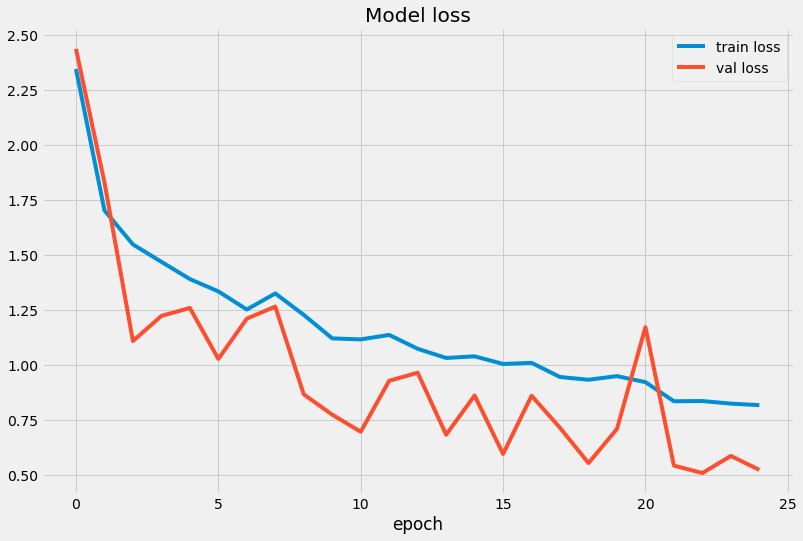

<Figure size 432x288 with 0 Axes>

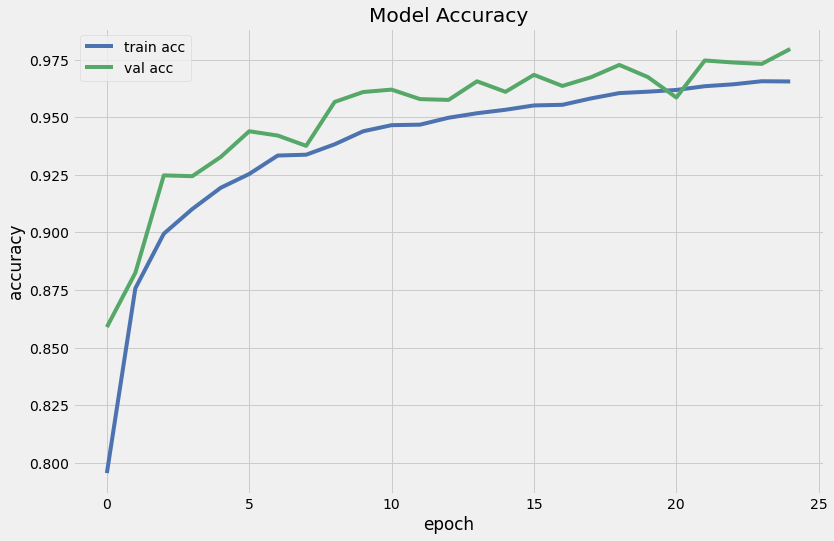

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.style.use('fivethirtyeight')
plt.figure(figsize=[12,8])
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Model loss')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')




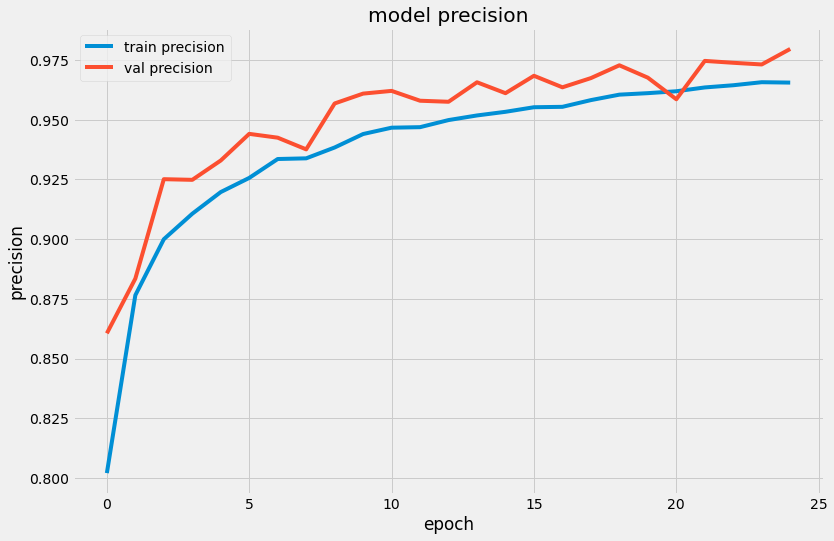

<Figure size 432x288 with 0 Axes>

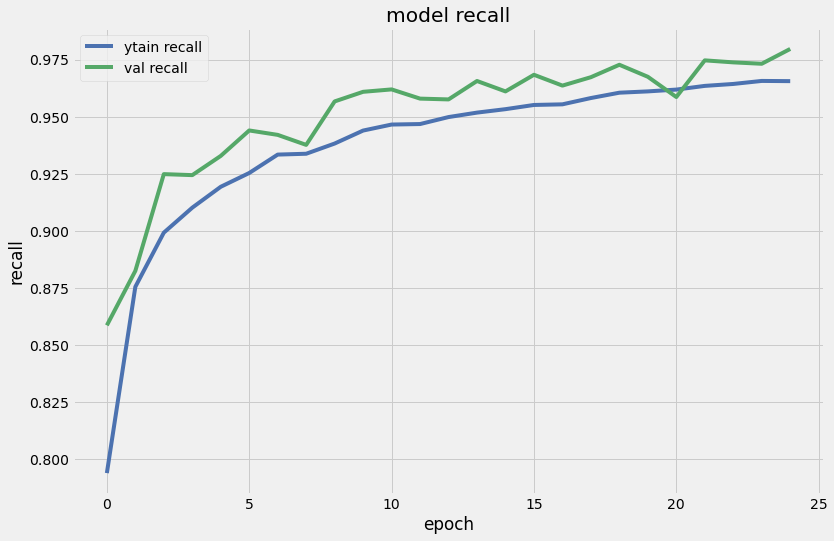

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the precision
plt.style.use('fivethirtyeight')
plt.figure(figsize=[12,8])
plt.plot(r.history['precision'], label='train precision')
plt.plot(r.history['val_precision'], label='val precision')
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('precision_recall')


# plot the recall
plt.style.use('seaborn-deep')
plt.figure(figsize=[12,8])
plt.plot(r.history['recall'], label='ytain recall')
plt.plot(r.history['val_recall'], label='val recall')
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('recall')



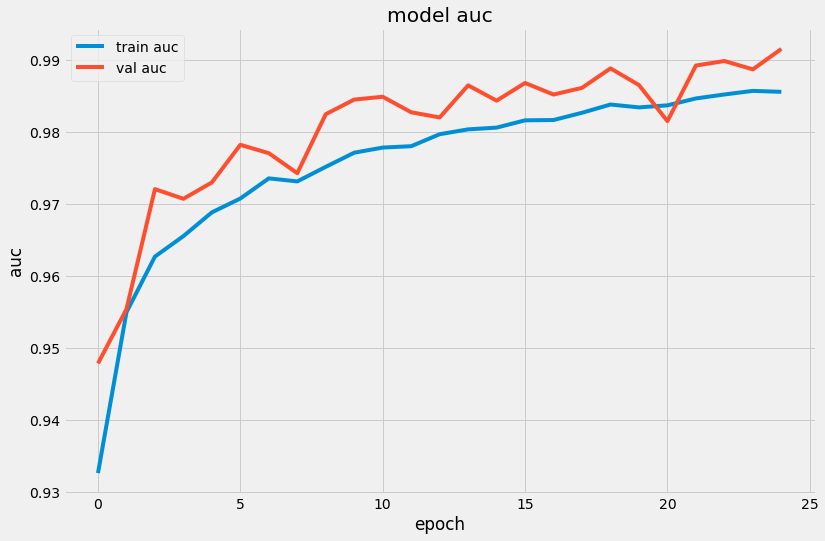

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the recall
plt.style.use('fivethirtyeight')
plt.figure(figsize=[12,8])
plt.plot(r.history['auc'], label='train auc')
plt.plot(r.history['val_auc'], label='val auc')
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('auc')


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception_segmented.h5')